## Homework - Machine Learning Preparation
### Agi Rahmawandi <br> Batch 57



In [117]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.2.5
pandas version :  2.2.3
seaborn version :  0.13.2


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [119]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

### Load data

In [120]:
df= pd.read_csv('./dataset/Product_Exclusive_Classification.csv')

## Exploratory Data Analysis (EDA)

## Pendekatan Numerik
## 1. Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq)<br>
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
misal untuk A: “Semua tipe data sudah sesuai”

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [122]:
## pengelompokan berdasar jenis kolom
cats = ['brand','category']
numbs = ['rating','number_of_reviews','love','price','value_price','id','exclusive']


In [123]:
df[cats].describe()

brand category
count                 8000     7987
unique                 310      142
top     SEPHORA COLLECTION  Perfume
freq                   492      619

In [124]:
df[numbs].describe()

rating  number_of_reviews          love        price  value_price  \
count  7905.000000        7991.000000  7.966000e+03  7992.000000  7983.000000   
mean      4.085136         303.574396  1.756396e+04    49.900935    50.983300   
std       0.761069         931.724460  4.425339e+04    46.864764    48.473049   
min       0.000000           0.000000  0.000000e+00     2.000000     2.000000   
25%       4.000000          14.000000  2.000000e+03    24.000000    24.000000   
50%       4.000000          56.000000  5.500000e+03    35.000000    35.000000   
75%       4.500000         231.500000  1.530000e+04    59.000000    60.000000   
max       5.000000       19000.000000  1.300000e+06   549.000000   549.000000   

                 id    exclusive  
count  8.000000e+03  8000.000000  
mean   1.910231e+06     0.255875  
std    3.858353e+05     0.436379  
min    5.000000e+01     0.000000  
25%    1.773379e+06     0.000000  
50%    2.030360e+06     0.000000  
75%    2.185074e+06     1.000000  
max    2.293801e+06     1.000000

In [125]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [126]:
df.sample(3)

id          brand          category  rating  number_of_reviews  \
5994  2185023  Mario Badescu  Mists & Essences     4.5               53.0   
6961  2235158  HUM Nutrition         Mini Size     4.0              281.0   
6467  2207892      Too Faced         Lip Stain     4.5              268.0   

         love  price  value_price  exclusive  
5994  11300.0   12.0         12.0          0  
6961   2000.0   10.0         10.0          0  
6467  54100.0   19.0         19.0          0

A. Type data dan nama kolom sudah sesuai <br>
- int64: id, exclusive
- float64: rating, number_of_reviews, love, price, value_price
- object: brand, category<br>

B. kolom yang memiliki nilai kosong adalah **category,rating, number_of_reviews,love,price,value_price**<br>
C. Terdapat beberapa kolom yang memiliki summary yang dirasa kurang tepat.
- **kolom love** mempunyai nilai`max 1.300.000` ke  nilai `mean 17.563` maupun ke nilai `median 5.500` yang terlampau jauh,kemungkinan ada outlier 
- kolom **number_of_reviews** nilai `max 19000 `ke nilai`mean 303.57`maupun ke nilai `median 56` yang terlampau jauh,kemungkinan ada outlier 
- begitupun dengan kolom **price dan price_value** jarak nilai `max 549` ke median ataupun ke mean nya terlihat jauh, kemungkinan juga ada outlier

## Pendekatan Grafis

## 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). <br>Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).<br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

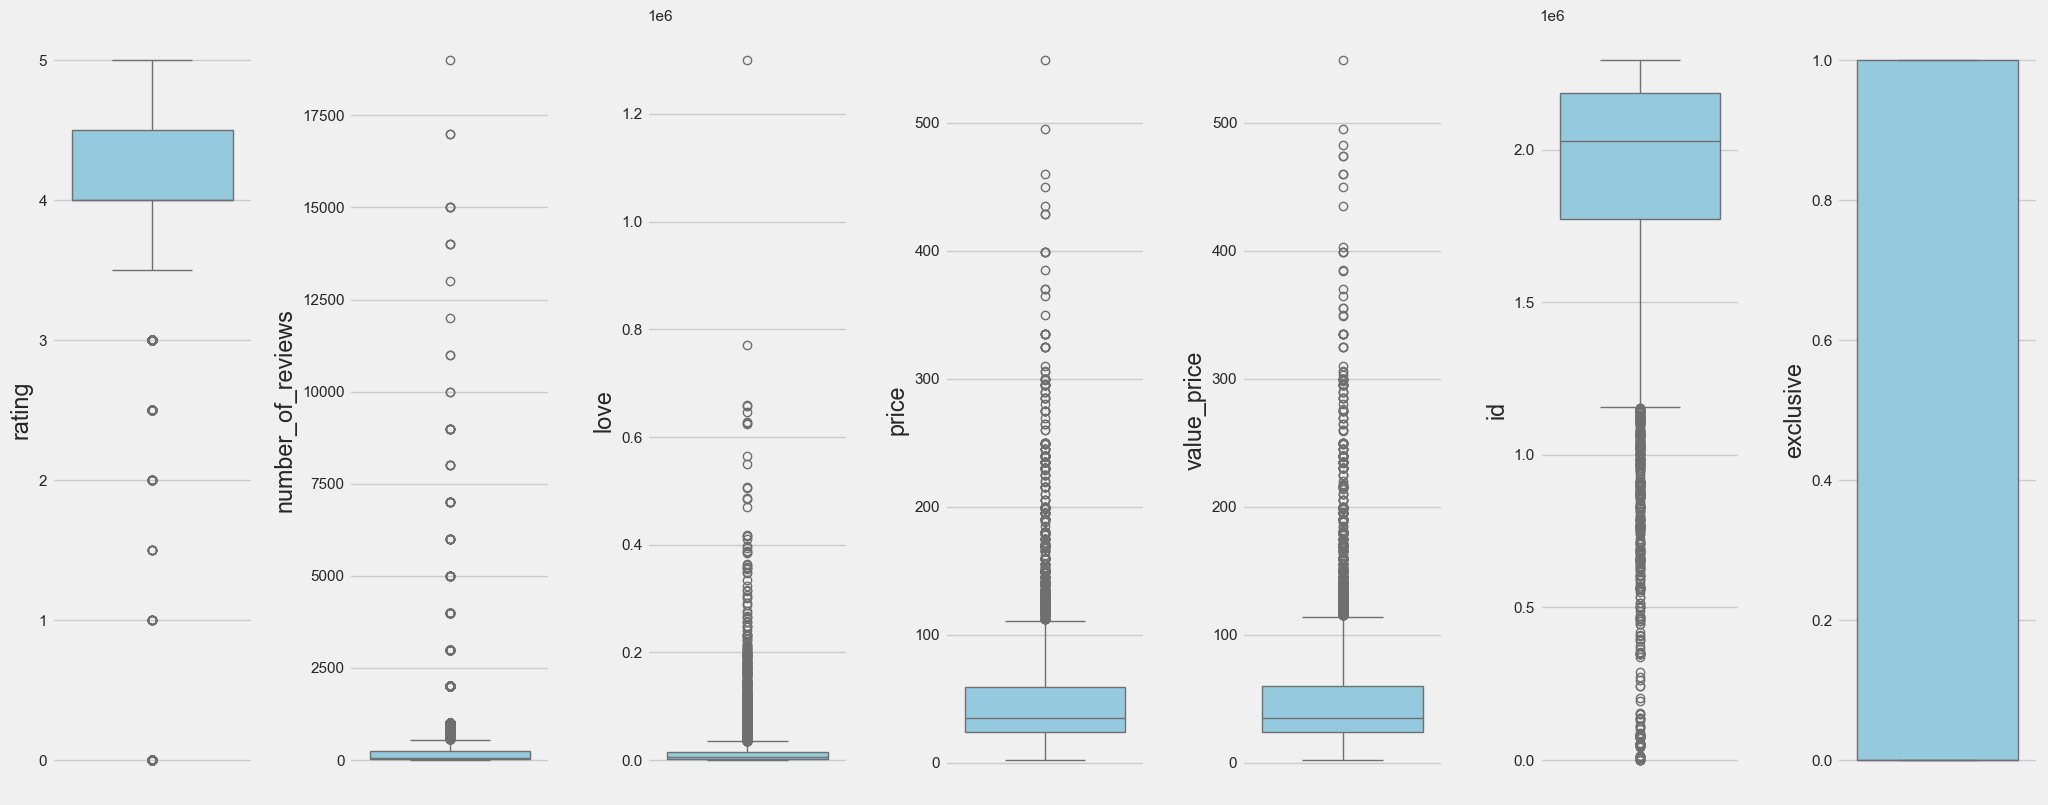

In [127]:

for i in range(len(numbs)):
    plt.subplot(1, len(numbs), i + 1)
    sns.boxplot(y=df[numbs[i]], color='skyblue')
    col_min = df[numbs[i]].min()
    col_max = df[numbs[i]].max()


plt.tight_layout()
plt.show()

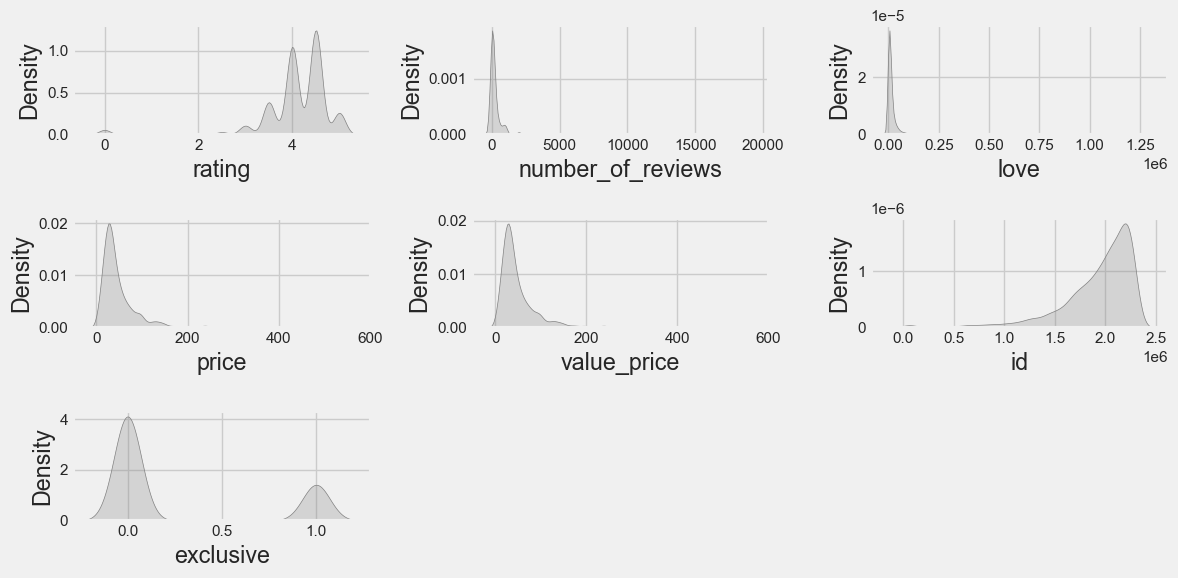

In [128]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))

# Flatten axes agar mudah diakses dengan index
axes = axes.flatten()

# Plot tiap kolom secara terpisah
for i, col in enumerate(numbs):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='gray')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Nonaktifkan axes yang tidak terpakai (jika kolom < jumlah subplot)
for j in range(len(numbs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

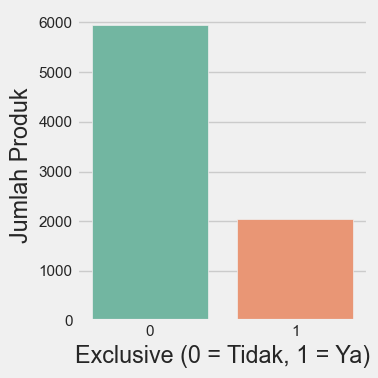

In [99]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='exclusive', palette='Set2')
plt.xlabel('Exclusive (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Produk')
plt.tight_layout()
plt.show()

In [100]:
df['exclusive'].value_counts()

exclusive
0    5953
1    2047
Name: count, dtype: int64

In [101]:
df[cats].describe()

brand category
count                 8000     7987
unique                 310      142
top     SEPHORA COLLECTION  Perfume
freq                   492      619

Melihat bentuk distribusi data dari masing masing kolom :<br>
- Kolom `rating`, data berkumpul di rentang angka 3 sampai 5, karena ada nilai min 0, perlu di pertimbangkat apakah dihapus ataukan digunakan.
- Kolom `number_of_review, Love,Price,value_price` terlihat memiliki pola yang sama yakni bertumpuk dinilai kecil/ `skewed positif`, serta memiliki outlier yang cukup jauh.  Perlu dilakukan scaling dan handling outlier saat dara pre-processing
- Lalu pada kolom `exclusive` angka 0 (‘tidak’)  lebih banyak dari angka 1 (‘ya’) datanya imbalace, perlu penangan data imbalance dalam pre-processing.
- Lalu pada kolom berupa kategory, yakni kolom `‘brand’ dan ‘category’`,  kategorinya terlalu banyak perlu dilakukan encoding


## 3. Multivariate Analysis
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

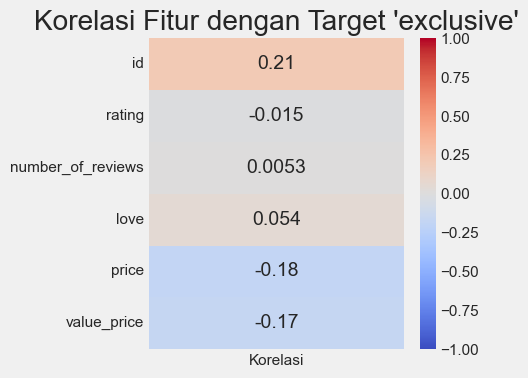

In [129]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi terhadap 'exclusive' dan ubah ke DataFrame (dengan kolom)
correlation_with_target = numerical_cols.corr()['exclusive'].drop('exclusive').to_frame()

# Optional: beri nama kolom agar lebih jelas
correlation_with_target.columns = ['Korelasi']

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Fitur dengan Target 'exclusive'")
plt.tight_layout()
plt.show()



<Axes: >

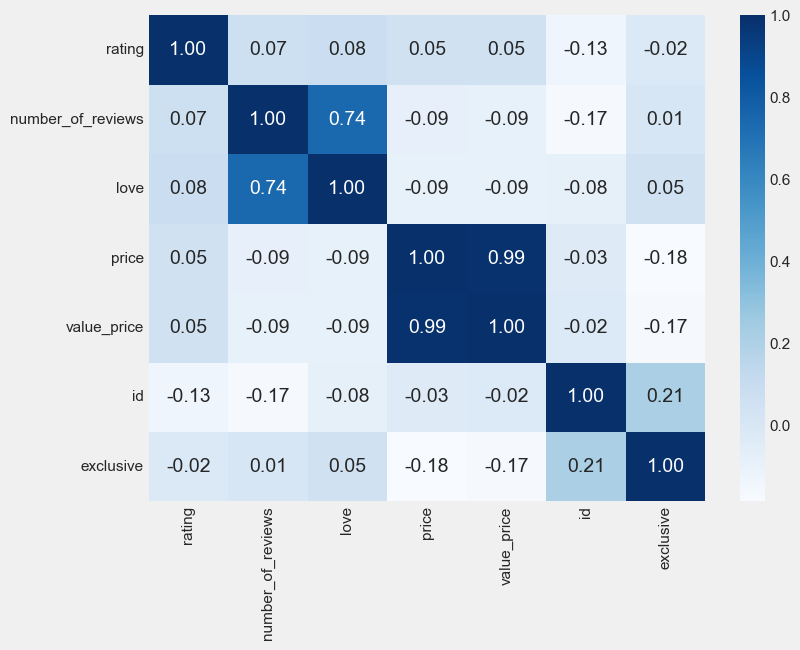

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numbs].corr(), cmap='Blues', annot=True, fmt='.2f')

## Dari korelasi antar kolom kita bisa melihat bahwa :
- Kolom yang paling relevan dan dipertahankan ialah kolom `price` senilai -0,18 yang berkolerasi negatif.<br>
- `Value_price` redundan dengan kolom `price`, makan akan didrop, atau bisa dibuat feature baru.<br>
- Kolom `love` dan `number_of_reviews` redundan dan akan diambil salah satu..<br>
- Meski memilki nilai korelasi cukup besar kolom `id` akan di drop karena kolom id merupakan Identifier, bukan fitur..<br>


## 4. Data Cleansing
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:<br>
A. Handle missing values<br>
B. Handle duplicate data<br>
C. Handle outliers<br>
D. Feature transformation<br>
E. Feature encoding<br>
F. Handle class imbalance<br>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.<br>
* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan
fokus menggunakan model yang robust terhadap outlier”).

In [130]:
df_clean = pd.read_csv('./dataset/Product_Exclusive_Classification.csv')

### A. Missing Value 

In [131]:
df_clean.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [132]:
df_clean['category'].fillna(df_clean['category'].mode()[0],inplace=True)
df_clean['rating'].fillna(df_clean['rating'].mode()[0],inplace=True)
df_clean['number_of_reviews'].fillna(df_clean['number_of_reviews'].mode()[0],inplace=True)
df_clean['love'].fillna(df_clean['love'].mode()[0],inplace=True)
df_clean['price'].fillna(df_clean['price'].mean(),inplace=True)
df_clean['value_price'] = df_clean['value_price'].fillna(df_clean['price'])

In [133]:
df_clean.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

Nilai null/kosong diisi dengan data modus dari kolom yang berkaitan, dan mean untuk kolom price

### B. Duplicate Values 


In [134]:
df_clean.duplicated().sum()

np.int64(0)

Tidak ada data yang duplikat

### C. Outliers 

In [135]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')
numbs = ['rating','number_of_reviews','love','price','value_price']
filtered_entries = np.array([True] * len(df_clean))
for col in numbs:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries

df_clean = df_clean[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 8000
Jumlah baris setelah memfilter outlier: 5549


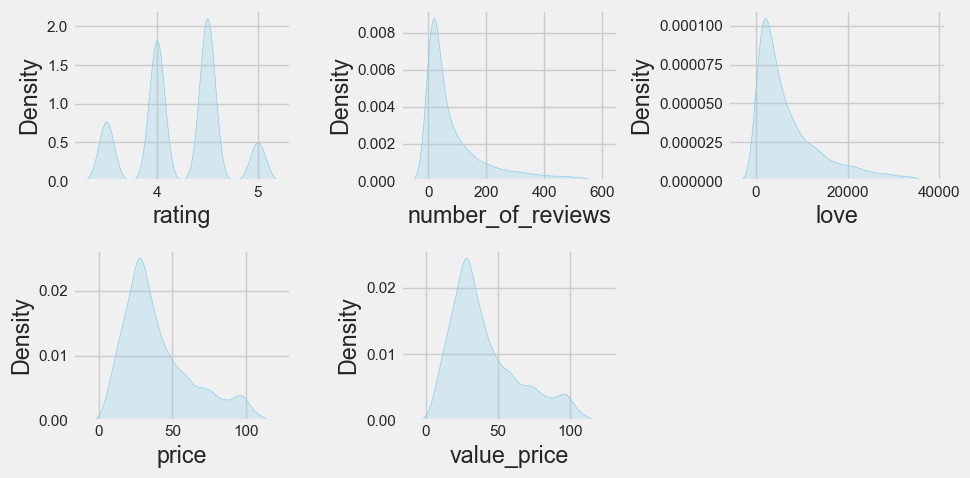

In [136]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

axes = axes.flatten()

for i, col in enumerate(numbs):
    sns.kdeplot(df_clean[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(numbs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Karena data seperti `price, value_price,love, dan number_of_reviews` tampak sangat skewed (skewed-positif) dan memiliki outlier ekstrem, maka digunakanlah `IQR` untuk menghiilangkan outlier. 

### D.Feature transformation


In [137]:
# Transformasi log 
df_clean['price'] = np.log1p(df_clean['price'])
df_clean['love'] = np.log1p(df_clean['love'])
df_clean['number_of_reviews'] = np.log1p(df_clean['number_of_reviews'])
df_clean['value_price'] = np.log1p(df_clean['value_price'])


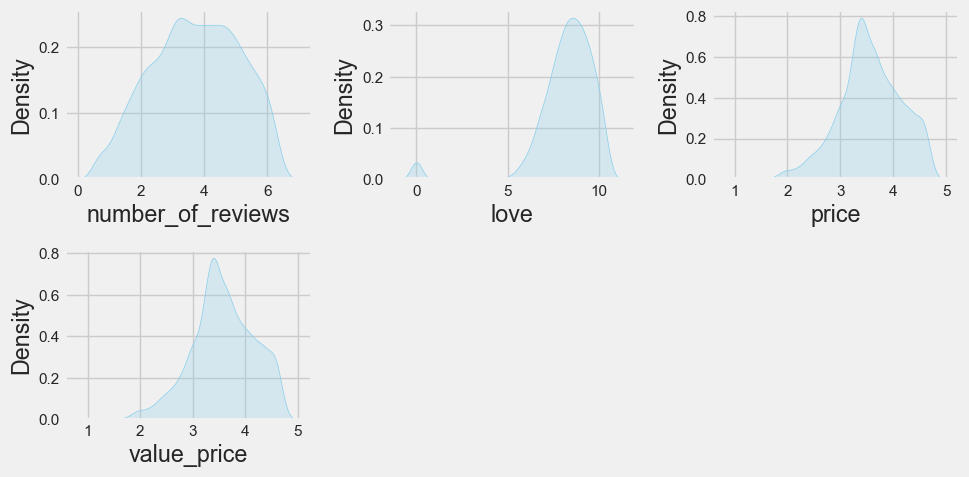

In [138]:
numbs = ['number_of_reviews','love','price','value_price']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numbs):
    sns.kdeplot(df_clean[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(numbs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Melakukan transformasi menggunakan logarithmic transformation pada fitur yang memiliki distribusi yang sangat miring ke kanan (skewed-positif) dan memiliki nilai ekstrim (outlier)

### E. Feature encoding

In [139]:
df_clean['brand_encoded'] = df_clean.groupby('brand')['exclusive'].transform('mean')
df_clean['category_encoded'] = df_clean.groupby('category')['exclusive'].transform('mean')

df_clean = df_clean.drop('brand', axis=1)
df_clean = df_clean.drop('category', axis=1)

In [140]:
df_clean.sample(5)

id  rating  number_of_reviews      love     price  value_price  \
71     288092     4.5           4.836282  7.863651  4.553877     4.553877   
3666  1989565     3.5           3.637586  8.794976  3.713572     3.713572   
5612  2158533     4.5           3.401197  7.170888  3.295837     3.295837   
1346  1644178     4.5           2.079442  6.068426  4.290459     4.290459   
6717  2221026     4.5           3.806662  9.190240  2.397895     2.397895   

      exclusive  brand_encoded  category_encoded  
71            0       0.068182          0.008850  
3666          0       0.038095          0.333333  
5612          0       0.125000          0.180180  
1346          0       0.142857          0.008850  
6717          1       0.968023          0.521277

Menggunakan `Target Encoding` karena High cardinality,dalam kolom banyak kategori dan akan menghasilkan banyak kolom.<br>
Tiap brand akan diganti dengan rata-rata nilai exclusive pada brand tersebut.<br>
Tiap category akan diganti dengan rata-rata nilai exclusive pada category tersebut.

### F. Handle class imbalance

In [114]:
df_clean['exclusive'].value_counts(normalize=True)  # proporsi
df_clean['exclusive'].value_counts()  

exclusive
0    4106
1    1443
Name: count, dtype: int64

In [141]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5549 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5549 non-null   int64  
 1   rating             5549 non-null   float64
 2   number_of_reviews  5549 non-null   float64
 3   love               5549 non-null   float64
 4   price              5549 non-null   float64
 5   value_price        5549 non-null   float64
 6   exclusive          5549 non-null   int64  
 7   brand_encoded      5549 non-null   float64
 8   category_encoded   5549 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 433.5 KB


In [142]:
X = df_clean.drop('exclusive', axis=1)
y = df_clean['exclusive']

# Split data (opsional)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Setelah SMOTE:")
print(y_resampled.value_counts())

Setelah SMOTE:
exclusive
0    3285
1    3285
Name: count, dtype: int64


Tager Exclusive bersifat imbalance `74% Tidak exclusive` dan `26% exclusive`. <br>
penanganan imbalance dilakukan menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan jumlah sampel.

# 5. Feature Engineering (30 poin)
Cek feature yang ada sekarang, lalu lakukan:<br>
A. Feature selection (membuang feature yang kurang relevan atau redundan)<br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada)<br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)<br>
* Untuk 5A & 5B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)<br>

### A. Feature selection

In [143]:
# Hitung korelasi semua kolom terhadap 'exclusive'
corr_matrix = df_clean.corr(numeric_only=True)

# Ambil korelasi fitur terhadap target
feature_corr = corr_matrix['exclusive'].drop('exclusive').sort_values(ascending=False)

print(feature_corr)

brand_encoded        0.809607
category_encoded     0.373227
id                   0.223768
love                 0.054535
rating               0.007721
number_of_reviews   -0.000547
value_price         -0.218664
price               -0.232899
Name: exclusive, dtype: float64


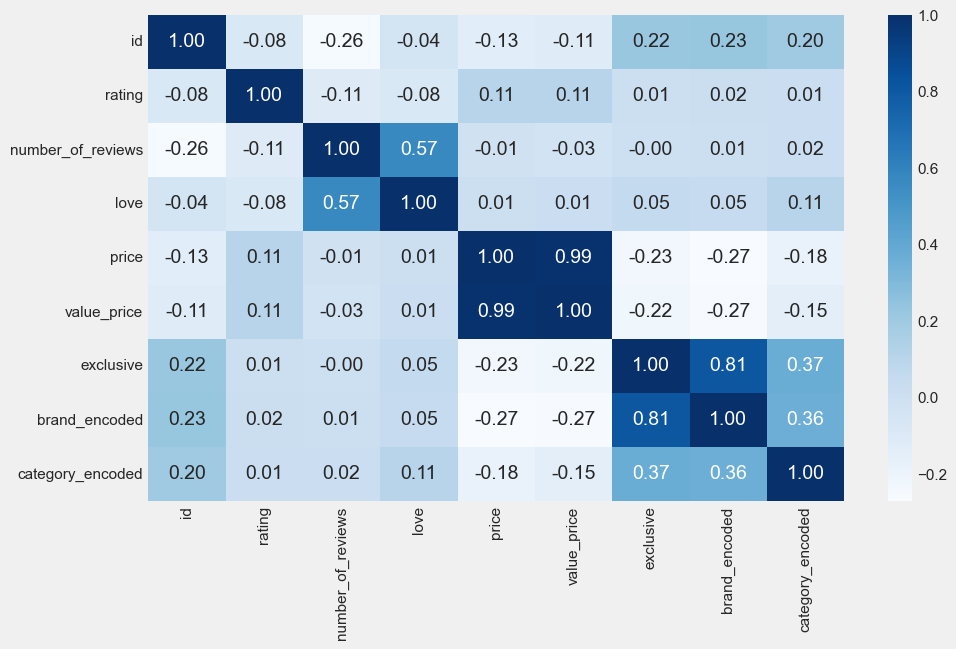

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

- Kolom **price** dan **value_price**  nilainya cukup signifikan berkorelasi negatif terhadap target, namun redundan 0.99 antar keduanya artinya informasi yang dibawa keduanya hampir sama,bisa di hapus salah satu seprti **value_price** setelah datanya diekstak menjadi feature baru.
- **brand_encoded  dan category_encoded** meski memiliki nilai yang cukup signifikan 0.81 terhadap target, ini merupakan predikor yang penting, jadi tidak akan dihapus.
- Feature **id** akan dihilangkan meski memilki nilai yang cukup signifikan terhadap target, karena id adalah identifier unik, tidak bermakna prediktif .


### B. Feature extraction

In [146]:
# 1. price_gap
df['price_gap'] = df['value_price'] - df['price']

# 2. discount persentase
df['discount_pct'] = ((df['value_price'] - df['price']) / df['value_price']) * 100


df[['price', 'value_price', 'price_gap', 'discount_pct']].sample(5)


price  value_price  price_gap  discount_pct
279    76.0         76.0        0.0      0.000000
7834  105.0        134.0       29.0     21.641791
4412   25.0         25.0        0.0      0.000000
5302   40.0         40.0        0.0      0.000000
1244   25.0         25.0        0.0      0.000000

Membuat feature baru bernama :<br> 
- `'discount_pct'` tujuannya untuk mengetahui tingkat percentase discount dari kolom value_price dan nilai price, 
- `'price_gap'` tujuannya untuk mengetahui nilai selisih antara price dan value_price


### C. feature tambahan

berikut feature tambahan yang mungkin bisa membantu dalam performansi model lebih baik :<br>
- `brand_tier`, membuat kategori luxury,premium,common
- `product_age`, umur produk setelah diluncurkan 
- `limited_edition`, apakah produk termasuk limited edition atau bukan 
- `seasonal_product`, produk yang direalease saat event tertentu (hari raya, natal, tahun baru,dsb)
